# 1. Acquire data

## 1.1 import libraries

In [ ]:
import warnings 
warnings.filterwarnings('ignore')

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1.2 Acquire data

In [ ]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
all_data = [train_data, test_data]

# 2. Analyze data

## 2.1 Analyze by describing data

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test_data.shape

(418, 11)

In [ ]:
# basic info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

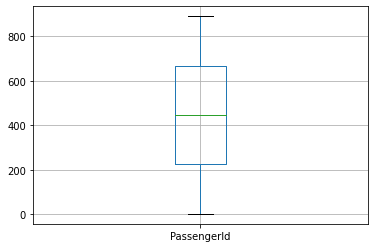

In [ ]:
train_data.boxplot(column=['PassengerId'])

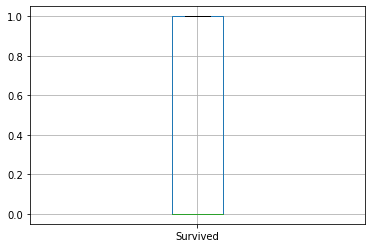

In [ ]:
train_data.boxplot(column=['Survived'])

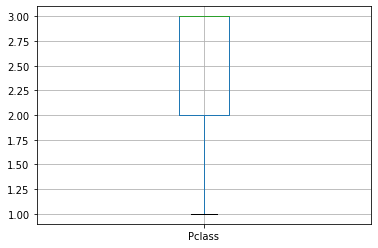

In [ ]:
train_data.boxplot(column=['Pclass'])

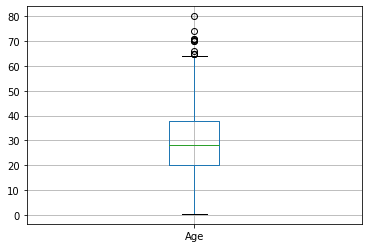

In [ ]:
train_data.boxplot(column=['Age'])

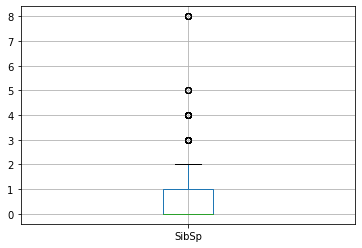

In [ ]:
train_data.boxplot(column=['SibSp'])

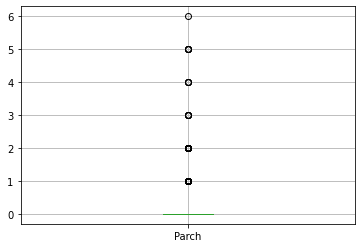

In [ ]:
train_data.boxplot(column=['Parch'])

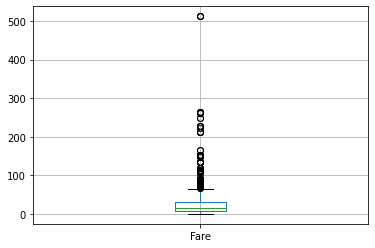

In [ ]:
train_data.boxplot(column=['Fare'])

In [ ]:
train_data[train_data.Fare == 512.3292]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [ ]:
train_data.shape

(891, 12)

In [ ]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Allison, Master. Hudson Trevor",male,1601,G6,S
freq,1,577,7,4,644


## 2.2 Analyze by pivoting features

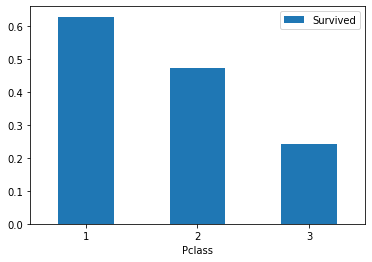

In [ ]:
# correlation between Pclass and Survived
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).\
                    mean().sort_values(by='Survived', ascending=False).plot.bar(x='Pclass', y='Survived', rot=0)

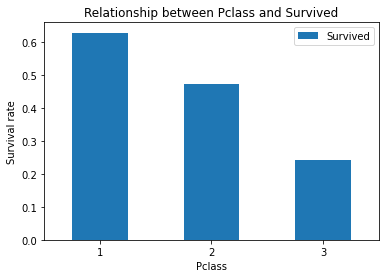

In [ ]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).\
                    mean().sort_values(by='Survived', ascending=False).plot.bar(x='Pclass', y='Survived', rot=0)
plt.title('Relationship between Pclass and Survived')
plt.ylabel('Survival rate')
plt.show()

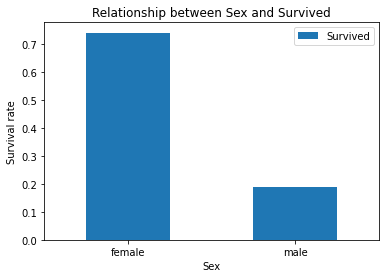

In [ ]:
train_data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).\
                mean().sort_values(by='Survived', ascending=False).plot.bar(x='Sex', y='Survived', rot=0)
plt.title('Relationship between Sex and Survived')
plt.ylabel('Survival rate')
plt.show()

In [ ]:
train_data[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).\
                    mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
train_data[["Parch", "Survived"]].groupby(['Parch'], as_index=False).\
                    mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## 2.3 Analyze by visualizing data

           Relation between Age and Survived


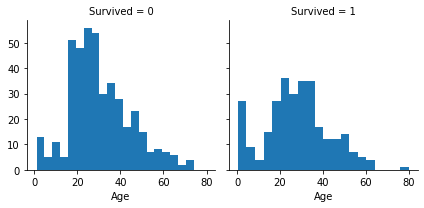

In [ ]:
# Relation between Age and Survived
print('           Relation between Age and Survived')
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Age', bins=20)
plt.show()

           Corrleation among Age, Pclass and Survived


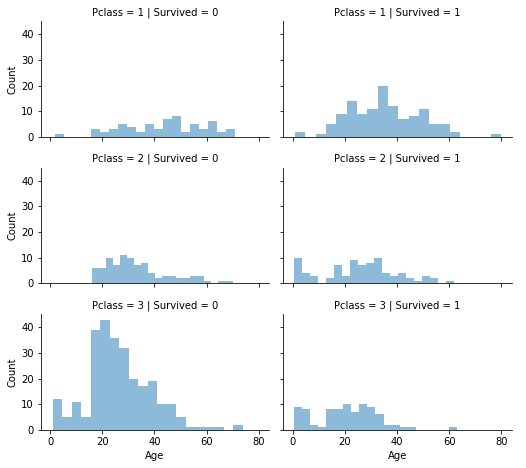

In [ ]:
# Corrleation among Age, Pclass and Survived
print('           Corrleation among Age, Pclass and Survived')
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.set_axis_labels('Age', 'Count')
grid.add_legend()
plt.show()

# 3. Wrangle data

## 3.1 Correct by dropping features

In [ ]:
# dropping some features
print("Before dropping features", train_data.shape, test_data.shape, all_data[0].shape, all_data[1].shape)

train_data = train_data.drop(['Ticket', 'Cabin'], axis=1)
test_data = test_data.drop(['Ticket', 'Cabin'], axis=1)
all_data = [train_data, test_data]

print("After dropping features", train_data.shape, test_data.shape, all_data[0].shape, all_data[1].shape)

Before dropping features (891, 12) (418, 11) (891, 12) (418, 11)
After dropping features (891, 10) (418, 9) (891, 10) (418, 9)


## 3.2 Convert a categorical feature

In [ ]:
# convert 'Sex' to numerical values
for dataset in all_data:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S


## 3.3 Create new feature

In [ ]:
# extract feature 'Title'
for dataset in all_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # print(dataset['Title'])
    
pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [ ]:
# Process 'Title'
for dataset in all_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt',\
    'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [ ]:
# convert 'Title' to ordinal
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in all_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,1


In [ ]:
# drop 'Name' and 'PassengerId'
train_data = train_data.drop(['Name', 'PassengerId'], axis=1)
test_data = test_data.drop(['Name'], axis=1)
all_data = [train_data, test_data]
train_data.shape, test_data.shape

((891, 9), (418, 9))

## 3.4 Complete a numerical continuous feature 'Age'

In [ ]:
train_data['Age'].fillna(train_data['Age'].mean(), inplace = True)
test_data['Age'].fillna(test_data['Age'].mean(), inplace = True)

In [ ]:
# create Age bands
train_data['AgeBand'] = pd.cut(train_data['Age'], 5)
print(train_data['AgeBand'])

train_data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).\
                        mean().sort_values(by='AgeBand', ascending=True)

0      (16.336, 32.252]
1      (32.252, 48.168]
2      (16.336, 32.252]
3      (32.252, 48.168]
4      (32.252, 48.168]
             ...       
886    (16.336, 32.252]
887    (16.336, 32.252]
888    (16.336, 32.252]
889    (16.336, 32.252]
890    (16.336, 32.252]
Name: AgeBand, Length: 891, dtype: category
Categories (5, interval[float64]): [(0.34, 16.336] < (16.336, 32.252] < (32.252, 48.168] <
                                    (48.168, 64.084] < (64.084, 80.0]]


,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.344168
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [ ]:
# replace Age with ordinals
for dataset in all_data:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
    
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1.0,1,0,7.2500,S,1,"(16.336, 32.252]"
1,1,1,1,2.0,1,0,71.2833,C,3,"(32.252, 48.168]"
2,1,3,1,1.0,0,0,7.9250,S,2,"(16.336, 32.252]"
3,1,1,1,2.0,1,0,53.1000,S,3,"(32.252, 48.168]"
4,0,3,0,2.0,0,0,8.0500,S,1,"(32.252, 48.168]"


In [ ]:
# remove 'AgeBand'
train_data = train_data.drop(['AgeBand'], axis=1)
all_data = [train_data, test_data]
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1.0,1,0,7.2500,S,1
1,1,1,1,2.0,1,0,71.2833,C,3
2,1,3,1,1.0,0,0,7.9250,S,2
3,1,1,1,2.0,1,0,53.1000,S,3
4,0,3,0,2.0,0,0,8.0500,S,1


## 3.5 Create new feature from existing features

In [ ]:
# create a new feature
for dataset in all_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).\
                            mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


Text(0, 0.5, 'Survival Rate')

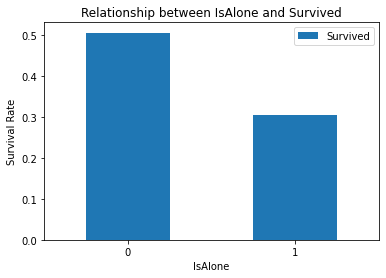

In [ ]:
# create feature 'IsAlone'
for dataset in all_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_data[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean().plot.bar(x='IsAlone', y='Survived', rot=0)
plt.title('Relationship between IsAlone and Survived')
plt.ylabel('Survival Rate')

In [ ]:
# drop 'Parch', 'SibSp', and 'FamilySize' features
train_data = train_data.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_data = test_data.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
all_data = [train_data, test_data]

train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1.0,7.2500,S,1,0
1,1,1,1,2.0,71.2833,C,3,0
2,1,3,1,1.0,7.9250,S,2,1
3,1,1,1,2.0,53.1000,S,3,0
4,0,3,0,2.0,8.0500,S,1,1


In [ ]:
# create a feature 'Age*Class'
for dataset in all_data:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_data.loc[:, ['Age*Class', 'Age', 'Pclass']].head()

,Age*Class,Age,Pclass
0,3.0,1.0,3
1,2.0,2.0,1
2,3.0,1.0,3
3,2.0,2.0,1
4,6.0,2.0,3


## 3.6 Complete a categorical feature

In [ ]:
# the mode for 'Embarked'
freq_port = train_data.Embarked.dropna().mode()[0]
freq_port

'S'

In [ ]:
# complete 'Embarked'
for dataset in all_data:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).\
                        mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


## 3.7 Convert categorical feature to numeric

In [ ]:
# convert 'Embarked'
for dataset in all_data:
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1.0,7.2500,0,1,0,3.0
1,1,1,1,2.0,71.2833,1,3,0,2.0
2,1,3,1,1.0,7.9250,0,2,1,3.0
3,1,1,1,2.0,53.1000,0,3,0,2.0
4,0,3,0,2.0,8.0500,0,1,1,6.0


## 3.8 Complete and convert a numeric feature

In [ ]:
# complete 'Fare' using median
test_data['Fare'].fillna(test_data['Fare'].dropna().median(), inplace=True)
test_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2.0,7.8292,2,1,1,6.0
1,893,3,1,2.0,7.0000,0,3,0,6.0
2,894,2,0,3.0,9.6875,2,1,1,6.0
3,895,3,0,1.0,8.6625,0,1,1,3.0
4,896,3,1,1.0,12.2875,0,3,0,3.0


In [ ]:
# create 'FareBand'
train_data['FareBand'] = pd.qcut(train_data['Fare'], 4)
train_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).\
                        mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [ ]:
# Convert 'Fare' to ordinal values
for dataset in all_data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_data = train_data.drop(['FareBand'], axis=1)
all_data = [train_data, test_data]
    
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1.0,0,0,1,0,3.0
1,1,1,1,2.0,3,1,3,0,2.0
2,1,3,1,1.0,1,0,2,1,3.0
3,1,1,1,2.0,3,0,3,0,2.0
4,0,3,0,2.0,1,0,1,1,6.0


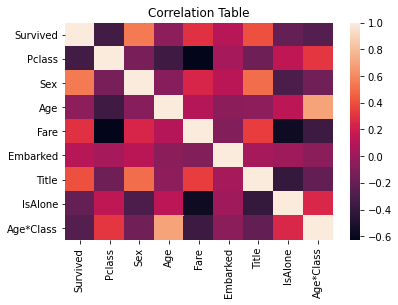

In [ ]:
sns.heatmap(train_data.corr())
plt.title('Correlation Table')
plt.show()

In [ ]:
test_data.head()
# test_data.describe()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2.0,0,2,1,1,6.0
1,893,3,1,2.0,0,0,3,0,6.0
2,894,2,0,3.0,1,2,1,1,6.0
3,895,3,0,1.0,1,0,1,1,3.0
4,896,3,1,1.0,1,0,3,0,3.0


In [ ]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title',
       'IsAlone', 'Age*Class'],
      dtype='object')

# 4. Model and predict ¶

## 4.1 Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split      # for split the data
from sklearn.model_selection import cross_val_score       # score evaluation

# Get train and test data
all_features = train_data.drop("Survived",axis=1)
targeted_feature = train_data["Survived"]

X_train,X_test,y_train,y_test = train_test_split(all_features, targeted_feature, test_size=0.2, random_state=42)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((712, 8), (179, 8), (712,), (179,))

The cross validated score for Logistic Regression is: 80.81
precision: 0.75
recall: 0.73


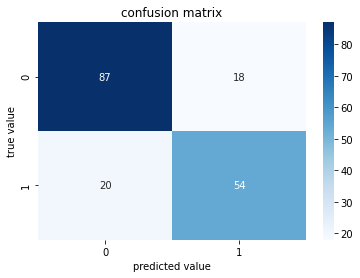

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt



model = LogisticRegression()
model.fit(X_train, y_train)

prediction_lr = model.predict(X_test)
# print(prediction_lr)

result_lr = cross_val_score(model, all_features, targeted_feature, cv=10, scoring='accuracy')
# print(result_lr)

print('The cross validated score for Logistic Regression is:', round(result_lr.mean()*100, 2))
# print(confusion_matrix(y_test, prediction_lr))
tn, fp, fn, tp = confusion_matrix(y_test, prediction_lr).ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
print('precision:', precision)
print('recall:', round(recall,2))
ax = plt.axes()
sns.heatmap(confusion_matrix(y_test, prediction_lr), ax = ax, annot=True, cmap='Blues')
ax.set_title('confusion matrix')
ax.set_xlabel('predicted value')
ax.set_ylabel('true value')
plt.show()

In [ ]:
y_train.name

'Survived'

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model= DecisionTreeClassifier(criterion='gini', min_samples_split=10, min_samples_leaf=1, max_features='auto')
model.fit(X_train,y_train)
prediction_tree = model.predict(X_test)
result_tree = cross_val_score(model, all_features, targeted_feature, cv=10, scoring='accuracy')
print('The cross validated score for Decision Tree classifier is:', round(result_tree.mean()*100, 2))

The cross validated score for Decision Tree classifier is: 81.04


## 4.2 Decision Tree

The cross validated score for Decision Tree classifier is: 81.6
precision: 0.74
recall: 0.66


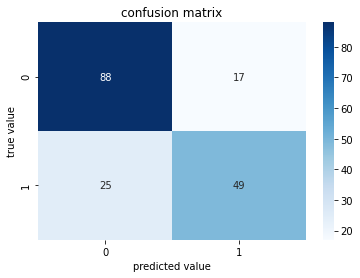

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree


model= DecisionTreeClassifier(criterion='gini', min_samples_split=10, min_samples_leaf=1, max_features='auto')
model.fit(X_train,y_train)
prediction_tree = model.predict(X_test)
# print(prediction_tree)
# print(y_test)
result_tree = cross_val_score(model, all_features, targeted_feature, cv=10, scoring='accuracy')
# print(result_tree)

print('The cross validated score for Decision Tree classifier is:', round(result_tree.mean()*100, 2))
# print(confusion_matrix(y_test, prediction_tree))
tn, fp, fn, tp = confusion_matrix(y_test, prediction_tree).ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
print('precision:', round(precision,2))
print('recall:', round(recall,2))
ax = plt.axes()
sns.heatmap(confusion_matrix(y_test, prediction_tree), ax = ax, annot=True, cmap='Blues')
ax.set_title('confusion matrix')
ax.set_xlabel('predicted value')
ax.set_ylabel('true value')
plt.show()


# fig = plt.figure()

# _ = tree.plot_tree(model, 
#                    feature_names=X_train.columns,  
#                     class_names=y_train.name,
#                    filled=True)
# fig.savefig("decistion_tree.png")
